# **Supervised Learning - Online Shoppers Purchasing Intention**
##### *Artificial Intelligence - Assignment No. 2*

#### Notebook by **T09G94**
- Joana Santos, up202006279
- Mafalda Costa, up202006417
- Mariana Carvalho, up202007620

## **Table of Contents**
- [1. Introduction](#1-introduction)
   - [1.1. Required libraries](#11-required-libraries)
   - [1.2. Metrics](#12-metrics)
   - [1.3. Attributes](#13-attributes)
- [2. Data analysis](#2-data-analysis)
   - [2.1. Feature separation](#21-feature-separation)
   - [2.2. Distribution of 'Revenue'](#22-distribution-of-revenue)
   - [2.3. NULL values](#23-null-values)
   - [2.4. Correlation analysis](#24-correlation-analysis)
- [3. Data pre-processing](#3-data-pre-processing)
   - [3.1. Remove duplicate rows](#31-remove-duplicate-rows)
   - [3.2. Outilers analysis](#32-outliers-analysis)
   - [3.3. Encoder and scaler](#33-encoder-and-scaler)
   - [3.4. Resampling](#34-resampling)
   - [3.5. Feature selection](#35-feature-selection)
   - [3.6. Features training](#36-features-training)
- [4. Classification](#4-classification)
   - [4.1. Decision Tree](#41-decision-tree)
   - [4.2. Random Forest](#42-random-forest)
   - [4.3. k-nearest neighbors (KNN)](#43-k-nearest-neighbors-knn)
   - [4.4. Support Vector Machines (SVM)](#44-support-vector-machines-svm)
   - [4.5. Naive Bayes](#45-naive-bayes)
   - [4.6. XGBoost](#46-xgboost)
   - [4.7. Neural Network](#47-neural-network)
- [5. Results analysis](#5-results-analysis)


## **1. Introduction**
For this second IART assignment we are applying machine learning models and algorithms related to supervised learning. For our specific theme, **"Online Shoppers purchasing intention"**, we aim to predict whether an online shopper is likely to make a purchase or not, using **supervised machine learning algorithms for classification**. We will conduct an exploratory **data analysis** to determine the relevant features for our prediction task and **evaluate** various **models** to identify the most accurate and efficient one. Our goal is to provide valuable insights into customer behavior.
The input data we will use to make predictions and identify patterns consists in a data set of
**17 features** of various types and **one target**, the **Revenue**, which indicates if a person made a buy or not. Seven of the features in the dataset are categorical, which require further pre processing

### **1.1. Required libraries**
#### Libraries
- NumPy
- Pandas
- Matplotlib
- Seaborn
- scikit-learn
- xgboost
- collections
- imblearn

#### Models
- Decision Tree
- k-nearest neighbours
- Random Forest
- Support Vector Machines (SVM)
- eXtreme Gradient Boosting
- Neural network
- Naive Bayes

In [ ]:
import numpy as np
from numpy import where
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import seaborn as sb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV,KFold, RandomizedSearchCV

from xgboost import XGBClassifier



### **1.2. Metrics**
- Confusion matrix
- Performance during learning
- Precision
- Recall
- Accuracy
- F1 measure
- Time spent to train/test the models

### **1.3. Attributes**
The dataset consists of 10 numerical (N) and 8 categorical (C) attributes.
- **Administrative** (N): number of pages visited by the visitor about count management (e.g. user details and account)
- **Administrative_Duration** (N): total time spent (seconds) by the visitor on account management related pages
- **Informational** (N): count of pages visited by the visitor (e.g. about and contact of the website)
- **Informational_Duration** (N): total time spent (seconds) in on Informational type of page
- **ProductRelated** (N): count of pages visited by the visitor (e.g. product details)
- **ProductRelated_Duration** (N): total time spent (seconds) in on ProductRelated type of page
- **BounceRates** (N): percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server
- **ExitRates** (N): the percentage of visitors to a page on the website from which they exit the website to a different website
- **PageValues** (N): the average value for a page that a user visited before landing on the goal page
- **SpecialDay** (N): indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day)
- **Month** (C): the month of the visit to the website
- **OperatingSystems** (C): the type of operation system used by the visitor
- **Browser** (C): the type of browser used by the visitor
- **Region** (C): the geographic region from which the session started
- **TrafficType** (C): describes how traffic arrived on the website (Direct, Organic, Referral, Social, Email, Display and Paid)
- **VisitorType** (C): returning or new visitor or other
- **Weekend** (C): indicating whether the date of the visit is weekend
- **Revenue** (C): indicates whether the visitor made a purchase or not

## **2. Data analysis**
[Go to Table of Contents](#table-of-contents)

To check for the need of data pre-processing, we need to firstly analyse our data.

The graphs, as the code to generate them takes some time to run, are all presented as images.

Initialy, we need to **import and load the dataset**. You can see the first few rows of the data.

In [ ]:
data = pd.read_csv("dataset/online_shoppers_intention.csv")
data.head()

Here, descriptive statistics are calculated. This provides meaningful insights into the distribution and summary of numerical variables in the data.

In [ ]:
data.describe()

The next block of code provides information about the dataset.

In [ ]:
data.info()

As you can see, the majority of the data consists of numerical features. However, we have identified 8 categorical features: 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend' and 'Revenue'. To utilize these features in our models, we will need to convert them into numerical representations.

To **convert 'Revenue', the target feature, into a numerical representation**, we can update the values using the following. It assigns the value 1 to all 'True' instances and 0 to all 'False' instances. This is done now to facilitate the analysis of the data.

In [ ]:
data["Revenue"] = data["Revenue"].apply(lambda x: 1 if x == True else 0)

### **2.1. Feature separation**

To facilitate the analysis, we separate the dataset into the target feature and the categorical and numerical features. 

In [ ]:
target="Revenue"
categorical_features=["OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend", "Month"]
numerical_features=data.columns.drop(categorical_features).drop(target)

### **2.2. Distribution of 'Revenue'**

To visualize the distribution of the target feature 'Revenue', we use a count plot. This plot displays the number of occurrences for each class in the 'Revenue' feature.

In [ ]:
sb.countplot(x=target,data=data)
plt.title("Revenue")
plt.show()

We can observe an imbalance between the two classes of the target feature. The number of instances labeled as 0 ('False') is significantly larger than the number of instances labeled as 1 ('True').
This can potentially affect the performance of certain machine learning models, and appropriate techniques such as oversampling and undersampling may be required to address this issue.

### **2.3. NULL values**

To check the presence of NULL values:

In [ ]:
data.isnull().sum()

Upon examination, it is concluded that there are no null values present, indicating that no missing values need to be handled in the dataset.

### **2.4. Correlation Analysis**

To explore the relationships between the numerical features, we generate a heatmap:

In [ ]:
temp= numerical_features.append(pd.Index([target]))
fig, ax = plt.subplots(figsize=(10, 10))
sb.heatmap(data[temp].corr(), annot=True, cmap="RdBu_r")
plt.show()

Based on the heatmap, the analysis yields the following observations:
- There is **generally very little correlation** among the features.
- There are a few cases of **high correlation** (|corr| >= 0.7):
    - BounceRates & ExitRates (0.9).
    - ProductRelated & ProductRelated_Duration (0.86).
- There are **moderate correlations** (0.3 < |corr| < 0.7):
    - Among the following features: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, and ProductRelated_Duration.
    - And between PageValues and Revenue.

To further visualize the relationships between the features, we generate a pairplot with the 'Revenue' target feature highlighted:

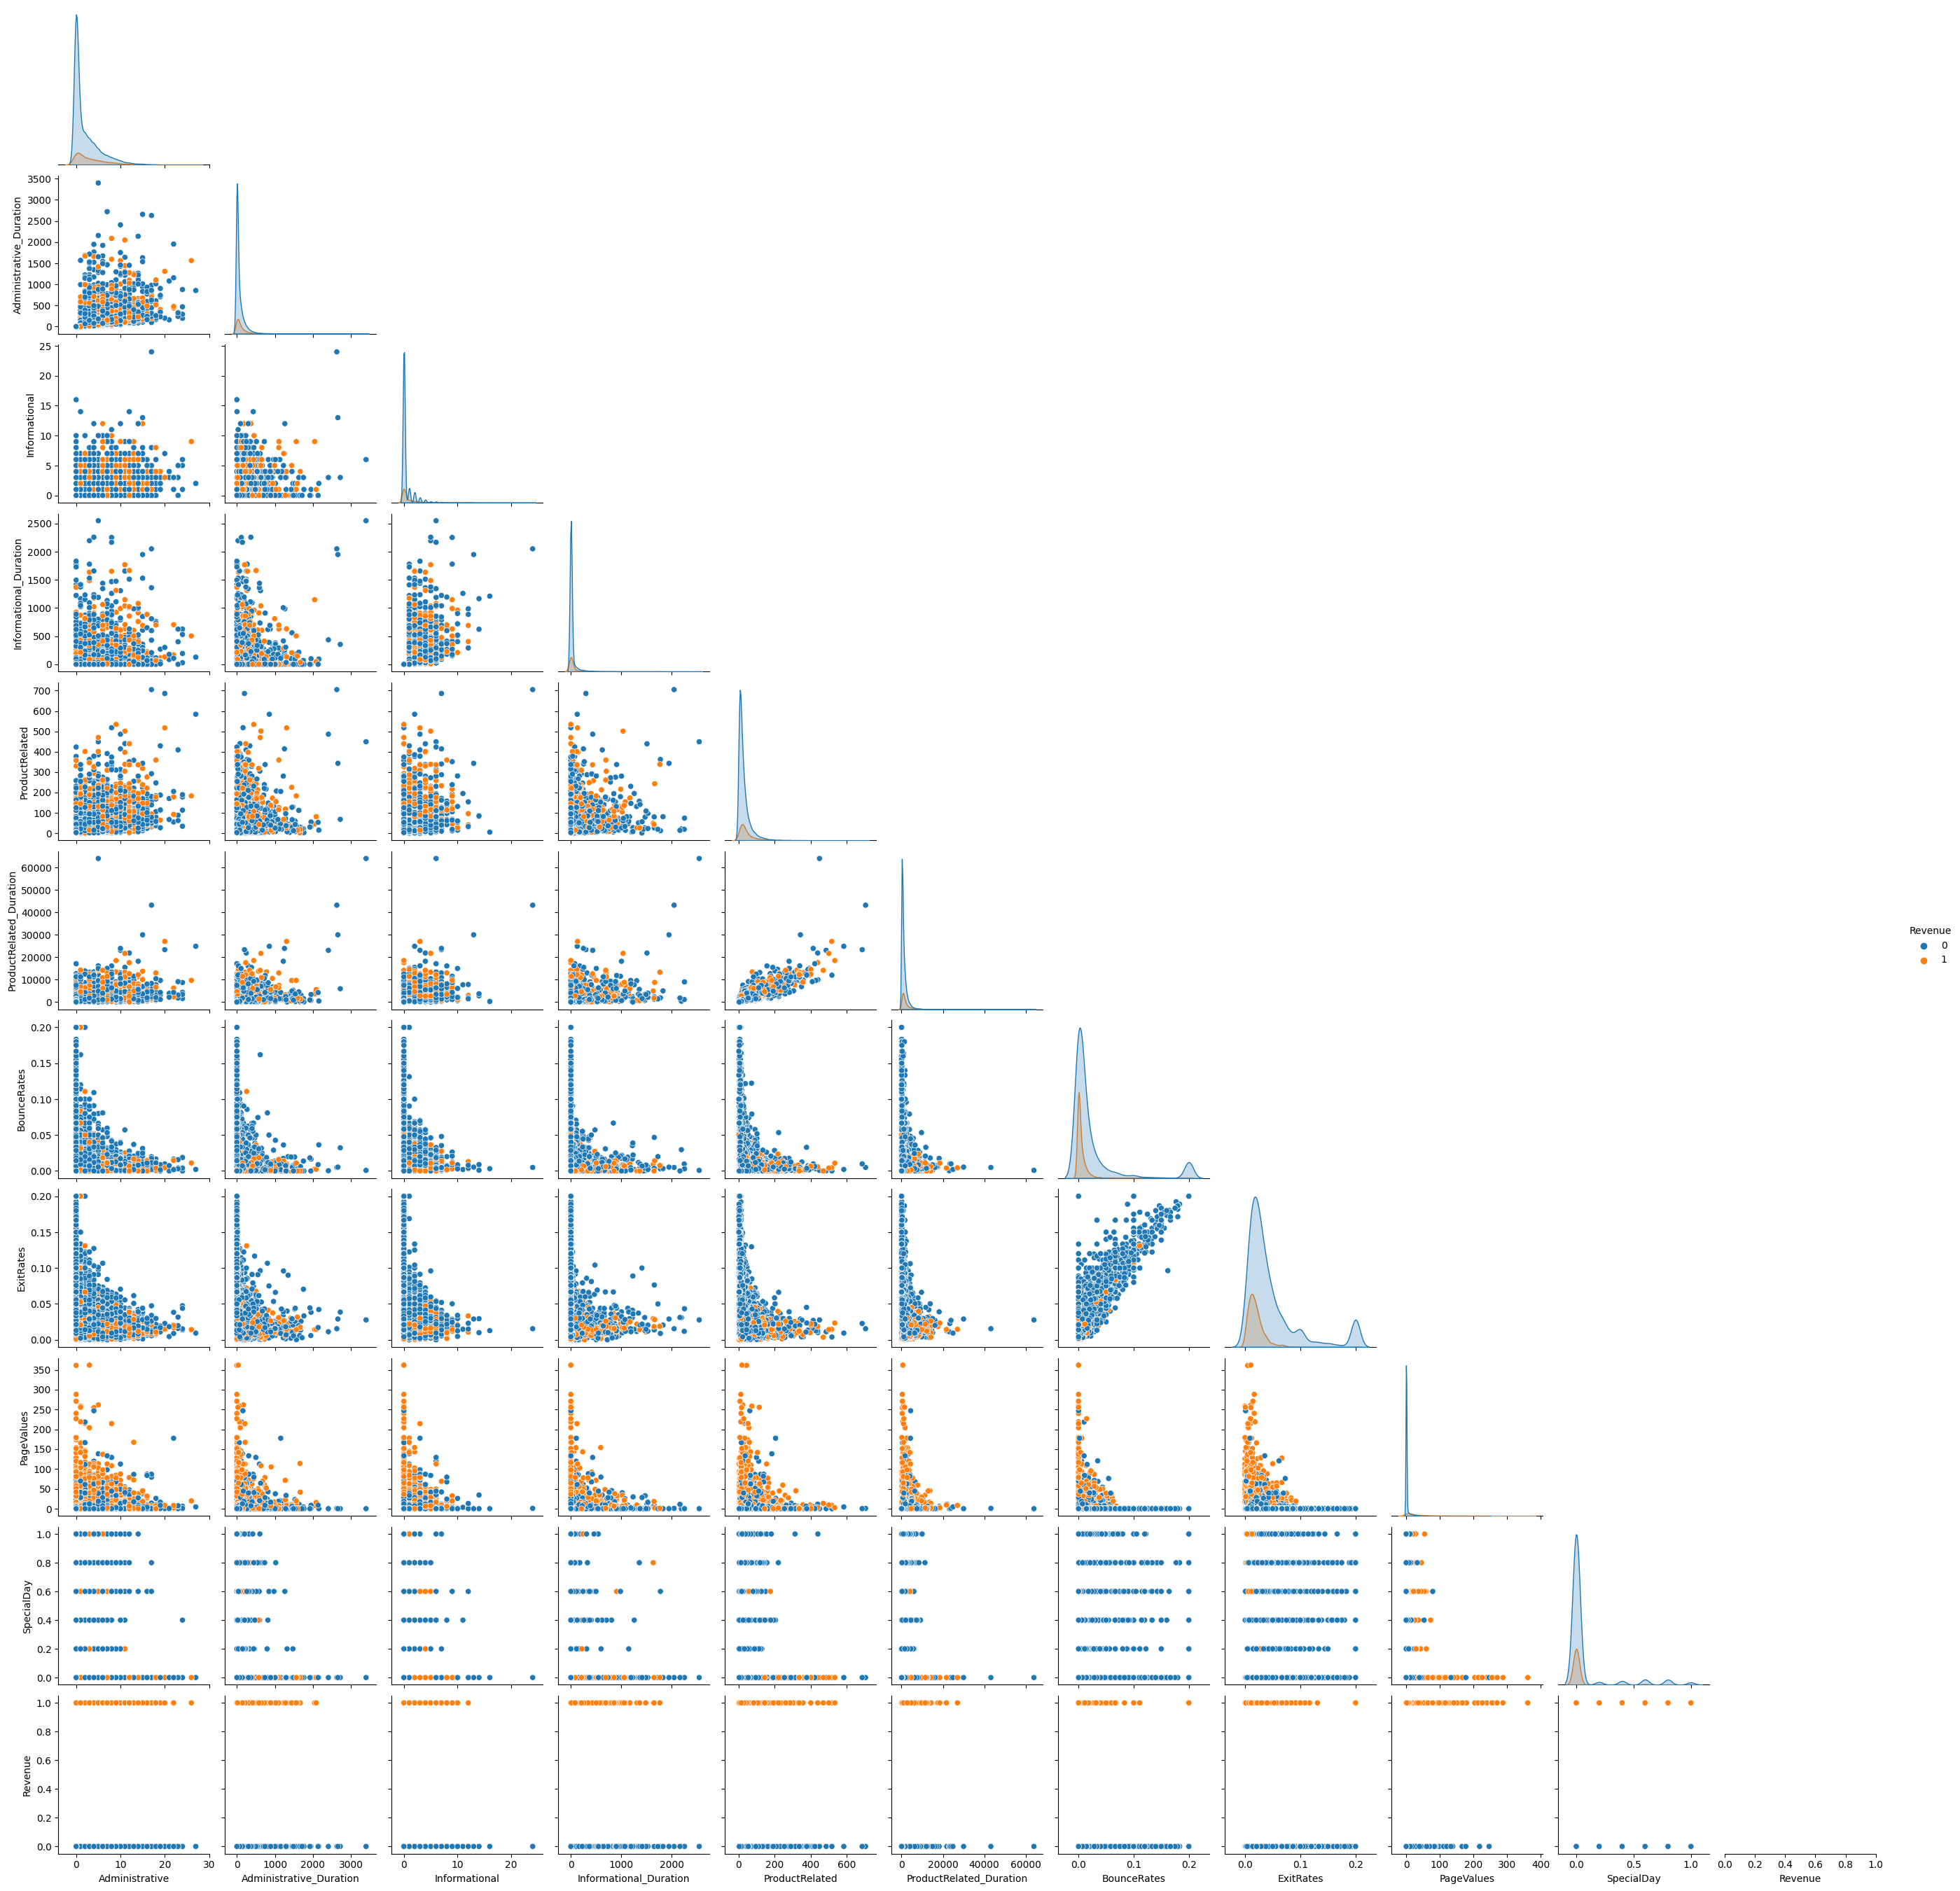

In [35]:
sb.pairplot(data, hue='Revenue', vars=numerical_features.append(pd.Index([target])), corner=True)

From the pairplot, the following observations can be made:
- There is no strong correlation between 'Revenue' and any other feature.
- Notably, there is a strong negative correlation between PageValues and other features shown in the plot.
- We can also see that the there are a few outliers present in the data that may need to be addressed.

## **3. Data pre-processing**
[Go to Table of Contents](#table-of-contents)

### **3.1. Remove duplicate rows**

Addressing the issue of duplicate rows, it was identified that there were initially 125 duplicate rows present. The following removes these duplicates:

In [ ]:
print("Total number of duplicate rows: ", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Total number of duplicate rows: ", data.duplicated().sum())

### **3.2. Outliers analysis**

Outliers are anomalies within the dataset and are rare occurrences. In this constant, we can think, for example, of a situation where the user accidentally leaves their desktop open on a product page, only to return half an hour later. The website's analytics would register this as the user spending half an hour engrossed in reading the product page - a highly unlikely scenario. Such events are not representative of typical user behavior.


To analyise the outliers, we can look at the pairplot above and the generated boxplots (for each numerical feature, grouped by the 'Revenue' target variable) bellow.

In [ ]:
plt.figure(figsize=(20, 20))

for i, collumn in enumerate(numerical_features):
    plt.subplot(4, 4, i+1)
    sb.boxplot(data=data, x=target, y=collumn)
plt.show()

We can observe that there are outliers present in all features, for both 'Revenue' categories, and that the median and IQR values really vary within the same feature.

To remove the outliers, we used the calculation Interquartille Range (IQR) by calculating the percentile for each of the features. We have decided to cut off only very "far out" information from the dataset thus including majority of the data, which is between the 2nd
percentile and 98th percentile. This is because there is a risk of losing important information if too much data is removed. We chose to calculate percentile instead of a normal distribution as our data does not follow a Gaussian distribution.


In [ ]:
Q1 = data[numerical_features].quantile(0.02)
Q3 = data[numerical_features].quantile(0.98)
IQR = Q3 - Q1

outlier_threshold = 1.5

# Identify outliers for each feature
outliers = (data[numerical_features] < (Q1 - outlier_threshold * IQR)) | (data[numerical_features] > (Q3 + outlier_threshold * IQR))

# Remove outliers from the dataset
data_no_outliers = data[numerical_features][~outliers.any(axis=1)]

# Print the number of removed outliers
num_outliers_removed = len(data[numerical_features]) - len(data_no_outliers)
print("Number of outliers removed:", num_outliers_removed)

data[numerical_features]=data_no_outliers
data.dropna(inplace=True)

plt.figure(figsize=(20, 20))
for i, collumn in enumerate(numerical_features):
    plt.subplot(4, 4, i+1)
    sb.boxplot(data=data, x=target, y=collumn)
plt.show()

Once again, a pairplot with a highlight ont the 'Revenue' target feature is generated, but for the data without outliers.

In [ ]:
sb.pairplot(data, hue='Revenue', vars=numerical_features.append(pd.Index([target])), corner=True)

### **3.3. Encoder and scaler**
To handle the categorical features in our dataset, we use OneHotEnconder. This process transforms the categorical features into numerical representations, allowing us to utilize them in our models. As a result, the 8 categorical features have been expanded into 66 attributes.

In [ ]:
encoder = OneHotEncoder()
for feature in categorical_features:
    onehotarray = encoder.fit_transform(data[[feature]]).toarray()
    items = [f'{feature}_{item}' for item in encoder.categories_[0]]
    data[items] = onehotarray
data=data.drop(categorical_features, axis=1)
data.head()


We exclude the target feature from the set of features.

In [ ]:
features=list(data.columns)
features.remove('Revenue')
features

We apply feature scaling to our subsets, using MinMaxScaler, in order to use them to train, validate, and test models. Feature scaling is particularly beneficial for models that are sensitive to the magnitude of features. 

In [ ]:
scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = pd.DataFrame(scaler.transform(data), columns=data.columns)
scaled_data.head()

### **3.4. Resampling**

In order to address the significant class imbalance between the two classes of our target feature, we performed resampling on our dataset. This funciton does both oversample and undersample by using a combination of, respectively, Synthetic Minority Over-sampling Technique (SMOTE) and Random Under-Sampling.

In [ ]:
def resampling_data(data=data):
    
    # converting the features into a dataframe with float64 data type
    X = pd.DataFrame(data[features], dtype=float)

    # class distribution
    counter = Counter(data[target])
    print("Original class distribution:", counter)

    # pipeline
    over = SMOTE(sampling_strategy=0.9)
    under = RandomUnderSampler(sampling_strategy=1)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    
    # transform the dataset
    X_resampled, y_resampled = pipeline.fit_resample(X, data[target])

    # new class distribution
    counter = Counter(y_resampled)
    print("Resampled class distribution:", counter)

    # new dataframe with the resampled data
    resampled_data = pd.DataFrame(X_resampled, columns=features)
    resampled_data[target] = y_resampled

    return resampled_data

data_resample = resampling_data()
scale_data_resample = resampling_data(scaled_data)

### **3.5. Feature selection**
In order to optimize our model's performance and reduce unnecessary complexity, we performed feature selection. With a total of 75 input features, it was essential to identify the features that have the most significant impact on the 'Revenue' and remove those that have a negligible effect.

This function performs feature selection using the chi-squared test as the scoring function. It selects the top 'n' features based on their scores.

In [ ]:
def feature_selection(features, n, data):
    selector = SelectKBest(score_func=mutual_info_classif, k=n)
    fit=selector.fit(data[features],data[target])
    # Get the selected feature indices
    selected_feature_indices = selector.get_support(indices=True)

    # Get the names of selected features
    selected_features = [data[features].columns[i] for i in selected_feature_indices]
    return selected_features

feature_dict_data = {}
for i in range(2, int(len(features))):
    feature_dict_data[i] = feature_selection(features, i, data) 

Here, we prepare the input data and labels for further use.

In [ ]:
all_inputs = data[features].values

all_labels = data[target].values

all_inputs_scaled = scaled_data[features].values

all_labels_scaled = scaled_data[target].values

all_inputs_resampling = data_resample[features].values

all_labels_resampling = data_resample[target].values

all_inputs_scaled_resampling = scale_data_resample[features].values

all_labels_scaled_resampling = scale_data_resample[target].values

### **3.6. Features training**

For training and evaluating the algorithms, we have developed two functions that assess the performance of the machine learning models on different sets of features and utilize K-fold cross-validation.

The 'training_and_predictions_with_KFold' function calculates performance metrics such as accuracy, precision, recall, and F1-score for each fold. Aditionally, if wanted, it visualizes the confusion matrix and plots the ROC curve.

In [ ]:
def training_and_predictions_with_KFold(Algorithm, name,num_features, data=data, draw_confusion_matrix=False):
    kf =KFold(n_splits=10)
    predictions = [] 
    results = []
    prediction_probs = []  # To store prediction probabilities
    selected_features=feature_dict_data[num_features]
    all_inputs = data[selected_features].values

    all_labels = data[target].values
    
    for i, (train_index, test_index) in enumerate(kf.split(all_inputs, all_labels)):
        # Split the data into training and testing sets
        X_train, X_test = all_inputs[train_index], all_inputs[test_index]
        y_train, y_test = all_labels[train_index], all_labels[test_index]
        Algorithm.fit(X_train, y_train)
        predictions.append(Algorithm.predict(X_test))
        results.append(y_test)
        if(hasattr(Algorithm, "predict_proba")):
            prediction_probs.append(Algorithm.predict_proba(X_test)[:, 1])  
        
    all_predictions = np.concatenate(predictions)
    all_results = np.concatenate(results)
    if(hasattr(Algorithm, "predict_proba")):
        all_prediction_probs = np.concatenate(prediction_probs)  
        
    #calculates the metrics
    accuracy = accuracy_score(all_results, all_predictions)
    precision = precision_score(all_results, all_predictions)
    recall = recall_score(all_results, all_predictions)
    f1 = f1_score(all_results, all_predictions)
    
    #prints the metrics, confusion matrix and ROC curve
    if draw_confusion_matrix:
        df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recall],
                       "Precision_score"       : [precision],
                       "F1_score"        : [f1],
                      })
        conf_matrix = confusion_matrix(all_results, all_predictions)
        plt.figure(figsize=(10, 5))  # Increase figure size for better visibility
        plt.subplot(1, 2, 1)  # First subplot for confusion matrix
        sb.heatmap(conf_matrix, cmap='Blues', annot=True, xticklabels=data['Revenue'].unique(), yticklabels=data['Revenue'].unique())
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title("Confusion matrix for "+name)

        # ROC curve
        plt.subplot(1, 2, 2)  # Second subplot for ROC curve
        fpr, tpr, thresholds = roc_curve(all_results, all_prediction_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic for '+name)
        plt.legend(loc="lower right")
        plt.tight_layout()  # Adjust subplot parameters to give specified padding
        plt.show()
        
        # Return both DataFrame and ROC curve metrics
        return df, {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}
    return accuracy, precision, recall, f1


The 'feature_num_training_and_predictions_with_KFold' function evaluates the performance of an algorithm with different numbers of features and identifies the optimal number of features based on the highest accuracy and precision scores achieved.

In [ ]:
def features_num_training_and_predictions_with_KFold(Algorithm, name, data=data):
    accuracy_scores=[]
    precision_scores=[]
    recall_scores=[]
    f1_scores=[]
    size_features=[]
    max_accuracy=0
    max_precision=0
    num_features=0
    for i in range(2, int(len(features))):
        accuracy_score, precision_score, recall_score, f1_score=training_and_predictions_with_KFold(Algorithm, name, i, data)
        accuracy_scores.append(accuracy_score)
        precision_scores.append(precision_score)
        recall_scores.append(recall_score)
        f1_scores.append(f1_score)
        size_features.append(i)
        if(accuracy_score>max_accuracy):
            max_accuracy=accuracy_score
            max_precision=precision_score
            num_features=i
        if(accuracy_score==max_accuracy and precision_score>max_precision):
            max_precision=precision_score
            num_features=i
           
    plt.figure()
    plt.plot(size_features, accuracy_scores, label="accuracy")
    plt.plot(size_features, precision_scores, label="precision")
    plt.plot(size_features, recall_scores, label="recall")
    plt.plot(size_features, f1_scores, label="f1")
    plt.xlabel("Number of features")
    plt.ylabel("Score")
    plt.title("Scores for different number of features of "+name)
    plt.legend()
    plt.show()
    return num_features
            

Dictionaries created to store the results of the training.

In [ ]:
roc_curve_data = {}
roc_curve_data_resample = {}

results_training = {}
results_training_resample ={}


## **4. Classification**
[Go to Table of Contents](#table-of-contents)

### **4.1. Decision Tree**

Firstly we will try to find the best parameters for the Decision Tree Classifier using GridSearchCV and RandomizedSearchCV.

In [ ]:
'''decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [3, 4, 5, 6], 
    'max_leaf_nodes': [None, 2, 3],
    'max_features': [None, 'sqrt', 'log2', 2, 4], 
    'min_samples_split': [1, 2, 3, 4],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'random_state': [None, 42, 100],
    'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
      }


cross_validation = KFold(n_splits=10)

grid_search = GridSearchCV( decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs_resampling, all_labels_resampling)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
'''

# all features
# Best score: 0.8978588273896191
# Best parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 3}

#resample
#Best score: 0.9879347826086956
#Best parameters: {'random_state': None, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'log_loss', 'class_weight': 'balanced', 'ccp_alpha': 0.3}

#Best score: 1.0
#Best parameters: {'random_state': None, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_leaf_nodes': 2, 'max_features': 4, 'max_depth': 3, 'criterion': 'entropy', 'class_weight': 'balanced', 'ccp_alpha': 0.4}



Now we will plot a graph that shows how the performance varies according to the number of filters in use.

In [ ]:
'''decision_tree_classifier = DecisionTreeClassifier(max_depth=5, criterion='entropy', splitter='best', min_samples_leaf=3, min_samples_split=3)
num_features=features_num_training_and_predictions_with_KFold(decision_tree_classifier, "Decision Tree")
print("Number of features : ", num_features)
    
decision_tree_classifier = DecisionTreeClassifier(random_state=None, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=2, max_features=4, max_depth=3, criterion='entropy', class_weight='balanced', ccp_alpha=0.4)
num_features_resample=features_num_training_and_predictions_with_KFold(decision_tree_classifier, "Decision Tree Resampling", data_resample)
print("Number of features resample: ", num_features_resample)'''

<img src="graphics/DT.png" />


The optimal number of features selected from the original dataset was 8.

<img src="graphics/DT_resampled.png" />

For the resampled data, the optimal number of features chosen increased to 14.

Then, we can teach the algorithm using the best parameters and using K-Fold cross-validation, to evaluate the model's accuracy.

Additionaly, we can visualize the model's performance by plotting the confusion matrix and the ROC curve.

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=5, criterion='entropy', splitter='best', min_samples_leaf=3, min_samples_split=3)
model_DT_Kfold, roc_curve_DT=training_and_predictions_with_KFold(decision_tree_classifier, "Decision Tree", 8,  data, draw_confusion_matrix=True)
decision_tree_classifier = DecisionTreeClassifier(random_state=None, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=2, max_features=4, max_depth=3, criterion='entropy', class_weight='balanced', ccp_alpha=0.4)
model_DT_Kfold_resampling, roc_curve_DT_resampling=training_and_predictions_with_KFold(decision_tree_classifier, "Decision Tree Resampling", 14,  data_resample,  draw_confusion_matrix=True)

roc_curve_data["Decision Tree"] = roc_curve_DT
roc_curve_data_resample["Decision Tree Resampling"] = roc_curve_DT_resampling

results_training["Decision Tree"] = model_DT_Kfold
results_training_resample["Decision Tree Resampling"] = model_DT_Kfold_resampling

model_performances = pd.concat([model_DT_Kfold, model_DT_Kfold_resampling],axis = 0).reset_index()
model_performances = model_performances.drop(columns = "index",axis =1) 
model_performances

### **4.2. Random Forest**

Firstly, we will try to find the best parameters for the Random Forest using GridSearchCV and RandomizedSearchCV.

In [ ]:
'''random_forest_classifier = RandomForestClassifier()

parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10,100],
    'max_depth': [ 4, 5, 6, 9, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'max_features': ['log2', 2, 4],
    'max_leaf_nodes': [None, 2,  5],
    'min_samples_leaf': [ 2, 4,],
    'min_samples_split': [2],
    'class_weight': ['balanced_subsample'],
    'random_state': [100],
    'ccp_alpha': [ 0.1, 0.2,0.4, 0.5]
    
}

     
cross_validation = KFold(n_splits=10)

grid_search = RandomizedSearchCV( random_forest_classifier,
                           param_distributions=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs_resampling, all_labels_resampling)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
'''
#Best parameters: {'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 6, 'n_estimators': 25}

#Best parameters: {'n_estimators': 50, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_leaf_nodes': 6, 'max_features': None, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}

#Best parameters: {'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 7, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 25}

#resampling
#Best score: 1.0
#Best parameters: {'random_state': 100, 'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 2, 'max_features': 2, 'max_depth': 9, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.5, 'bootstrap': True}

#Best score: 1.0
#Best parameters: {'random_state': 100, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_leaf_nodes': 5, 'max_features': 'log2', 'max_depth': 4, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.4, 'bootstrap': True}

#Best score: 1.0
#Best parameters: {'random_state': 100, 'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_leaf_nodes': 2, 'max_features': 2, 'max_depth': 5, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1, 'bootstrap': False}

#Best score: 1.0
#Best parameters: {'ccp_alpha': 0.1, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 4, 'max_features': 2, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 100}

#Best score: 1.0
#Best parameters: {'random_state': 100, 'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_features': 4, 'max_depth': 20, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.4}

Now we will plot a graph that shows how the performance varies according to the number of filters in use.

In [ ]:
'''random_forest_classifier = RandomForestClassifier(criterion='gini', max_depth=6, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=3, n_estimators=25)
num_features=features_num_training_and_predictions_with_KFold(random_forest_classifier, "Random Forest", data=data)
print("Number of features: ", num_features)
random_forest_classifier = RandomForestClassifier(random_state=100, n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_leaf_nodes=None, max_features=4, max_depth=20, criterion='gini', class_weight='balanced_subsample', ccp_alpha=0.4)
num_features_resample=features_num_training_and_predictions_with_KFold(random_forest_classifier, "Random Forest Resampling", data_resample)
print("Number of features resample: ", num_features_resample)'''


<img src="graphics/RF.png" />

The optimal number of features selected from the original dataset was 5.

<img src="graphics/RF_resampled.png" />

The number of features chosen from the resample data where 2.

Then, we can teach the algorithm using the best parameters and using K-Fold cross-validation, to evaluate the model's accuracy.

Additionaly, we can visualize the model's performance by plotting the confusion matrix and the ROC curve.

In [ ]:
random_forest_classifier = RandomForestClassifier(criterion='gini', max_depth=6, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=3, n_estimators=25)
model_RF_Kfold, roc_curve_RF=training_and_predictions_with_KFold(random_forest_classifier, "Random Forest", 5, data, draw_confusion_matrix=True)
random_forest_classifier = RandomForestClassifier(random_state=100, n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_leaf_nodes=None, max_features=4, max_depth=20, criterion='gini', class_weight='balanced_subsample', ccp_alpha=0.4)
model_RF_Kfold_resampling, roc_curve_RF_resampling=training_and_predictions_with_KFold(random_forest_classifier, "Random Forest Resampling", 2 , data_resample, draw_confusion_matrix=True)

roc_curve_data["Random Forest"] = roc_curve_RF
roc_curve_data_resample["Random Forest Resampling"] = roc_curve_RF_resampling

results_training["Random Forest"] = model_RF_Kfold
results_training_resample["Random Forest Resampling"] = model_RF_Kfold_resampling

model_performances = pd.concat([model_RF_Kfold, model_RF_Kfold_resampling],axis = 0).reset_index()
model_performances = model_performances.drop(columns = "index",axis =1) 
model_performances


### **4.3. k-nearest neighbors (KNN)**

Firstly, we will try to find the best parameters for the k-nearest neighbors (KNN) using GridSearchCV and RandomizedSearchCV.

In [ ]:

'''knn = KNeighborsClassifier()

parameter_grid={
    'n_neighbors': list(range(1, 5)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['kd_tree', 'auto'],
    'n_jobs': [1,2],
    'leaf_size': [ 30, 40],
    'p': [1, 2, 3],
    'metric': ['manhattan'],
}
cross_validation = KFold(n_splits=10)

grid_search = GridSearchCV( knn,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs_scaled_resampling, all_labels_scaled_resampling)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

'''

## all features
##Best parameters: {'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'chebyshev', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
# Resampled

#Best score: 0.8571696436505821
#Best parameters: {'weights': 'distance', 'p': 3, 'n_neighbors': 14, 'n_jobs': 3, 'metric': 'chebyshev', 'leaf_size': 30, 'algorithm': 'kd_tree'}

#Best score: 0.8542750309319225
#Best parameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 8, 'n_jobs': None, 'metric': 'euclidean', 'leaf_size': 20, 'algorithm': 'kd_tree'}

#Best score: 0.8624621126673911
#Best parameters: {'weights': 'uniform', 'p': 3, 'n_neighbors': 19, 'n_jobs': 3, 'metric': 'chebyshev', 'leaf_size': 30, 'algorithm': 'kd_tree'}

#Best score: 0.8632891058111
#Best parameters: {'weights': 'uniform', 'p': 3, 'n_neighbors': 22, 'n_jobs': None, 'metric': 'chebyshev', 'leaf_size': 30, 'algorithm': 'kd_tree'}

#Best parameters: {'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'chebyshev', 'n_jobs': None, 'n_neighbors': 26, 'p': 1, 'weights': 'uniform'}



#Best score: 0.8817934782608695
#Best parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 6, 'n_jobs': 2, 'metric': 'manhattan', 'leaf_size': 30, 'algorithm': 'kd_tree'}

#Best score: 0.8973913043478261
#Best parameters: {'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'manhattan', 'n_jobs': 1, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

#Best score: 0.9229891304347827
#Best parameters: {'weights': 'uniform', 'p': 3, 'n_neighbors': 1, 'n_jobs': 1, 'metric': 'manhattan', 'leaf_size': 30, 'algorithm': 'auto'}

Now we will plot a graph that shows how the performance varies according to the number of filters in use.

In [ ]:
'''knn_classifier = KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='chebyshev', n_jobs=None, n_neighbors=26, p=1, weights='uniform')
num_features=features_num_training_and_predictions_with_KFold(knn_classifier, "KNN", scaled_data)
print("Number of features: ", num_features)
knn_classifier = KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='manhattan', n_jobs=1, n_neighbors=1, p=1, weights='uniform')
num_features_resample=features_num_training_and_predictions_with_KFold(knn_classifier, "KNN Resampling", scale_data_resample)
print("Number of features resample: ", num_features_resample)'''

<img src="graphics/KNN.png" />

The optimal number of features selected from the original dataset was 6.


<img src="graphics/KNN_resampled.png" />

For the resampled data, the optimal number of features chosen increased to 40.


Then, we can teach the algorithm using the best parameters and using K-Fold cross-validation, to evaluate the model's accuracy.

Additionaly, we can visualize the model's performance by plotting the confusion matrix and the ROC curve.

In [ ]:
knn_classifier = KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='chebyshev', n_jobs=None, n_neighbors=26, p=1, weights='uniform')
model_KNN_Kfold, roc_curve_KNN=training_and_predictions_with_KFold(knn_classifier, "KNN", 6, scaled_data, draw_confusion_matrix=True)
knn_classifier = KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='manhattan', n_jobs=1, n_neighbors=1, p=1, weights='uniform')
model_KNN_Kfold_resampling, roc_curve_KNN_resampling=training_and_predictions_with_KFold(knn_classifier, "KNN Resampling", 40, scale_data_resample, draw_confusion_matrix=True)

roc_curve_data["KNN"] = roc_curve_KNN
roc_curve_data_resample["KNN Resampling"] = roc_curve_KNN_resampling

results_training["KNN"] = model_KNN_Kfold
results_training_resample["KNN Resampling"] = model_KNN_Kfold_resampling

model_performances = pd.concat([model_KNN_Kfold, model_KNN_Kfold_resampling],axis = 0).reset_index()
model_performances = model_performances.drop(columns = "index",axis =1) 
model_performances


### **4.4. Support Vector Machines (SVM)**

Firstly, we will try to find the best parameters for the Support Vector Machines (SVM) using GridSearchCV and RandomizedSearchCV.

In [ ]:
'''svm = SVC()

parameter_grid = {'C': [10, 100, 1000],
                  'kernel': ['poly', 'rbf'],
                  'gamma': [1, 0.1,0.01],
                  'coef0': [0.0, 0.1, 0.2],
                  }


cross_validation = KFold(n_splits=10)

grid_search =RandomizedSearchCV( svm,
                           param_distributions=parameter_grid,
                           cv=cross_validation)
    
grid_search.fit(all_inputs_scaled_resampling, all_labels_scaled_resampling)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))'''

#Best score: 0.8847922947043182
#Best parameters: {'shrinking': True, 'probability': False, 'kernel': 'poly', 'gamma': 'auto', 'degree': 1, 'coef0': 0.1, 'C': 100}
#Best score: 0.8866946250230707
#Best parameters: {'shrinking': True, 'probability': True, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 1, 'coef0': 0.0, 'C': 100}

#resample
#Best score: 0.9165760869565218
#Best parameters: {'kernel': 'rbf', 'gamma': 1, 'degree': 3, 'coef0': 0.0, 'C': 10}

#Best score: 0.8608695652173914
#Best parameters: {'kernel': 'poly', 'gamma': 0.01, 'degree': 3, 'coef0': 0.1, 'C': 1000}
#Best score: 0.8956734486319318
#Best parameters: {'kernel': 'rbf', 'gamma': 0.1, 'degree': 2, 'coef0': 0.2, 'C': 100}
#Best score: 0.9282608695652174
#Best parameters: {'kernel': 'rbf', 'gamma': 1, 'coef0': 0.1, 'C': 1000}



Now we will plot a graph that shows how the performance varies according to the number of filters in use.

In [ ]:
'''svm_classifier = SVC(shrinking=True, kernel='poly', gamma='auto', degree=1, coef0=0.1, C=100)
num_features=features_num_training_and_predictions_with_KFold(svm_classifier, "SVM", scaled_data)
print("Number of features: ", num_features)
svm_classifier = SVC(kernel='rbf', gamma=1, coef0=0.1, C=1000)
num_features_resample=features_num_training_and_predictions_with_KFold(svm_classifier, "SVM Resampling", scale_data_resample)
print("Number of features resample: ", num_features_resample)'''

<img src="graphics/SVM.png" />

The number of features chosen from the data where 7.

<img src="graphics/SVM_resampled.png" />

The number of features chosen from the resample data where 74.

Then, we can teach the algorithm using the best parameters and using K-Fold cross-validation, to evaluate the model's accuracy.

Additionaly, we can visualize the model's performance by plotting the confusion matrix and the ROC curve.

In [ ]:
svm_classifier = SVC(shrinking=True, kernel='poly', gamma='auto', degree=1, coef0=0.1, C=100, probability=True)
model_SVM_Kfold, roc_curve_SVM=training_and_predictions_with_KFold(svm_classifier, "SVM", 7, scaled_data , draw_confusion_matrix=True)
svm_classifier = SVC(kernel='rbf', gamma=1, coef0=0.1, C=1000, probability=True)
model_SVM_Kfold_resampling, roc_curve_SVM_resampling=training_and_predictions_with_KFold(svm_classifier, "SVM Resampling", 74, scale_data_resample, draw_confusion_matrix=True)

roc_curve_data["SVM"] = roc_curve_SVM
roc_curve_data_resample["SVM Resampling"] = roc_curve_SVM_resampling

results_training["SVM"] = model_SVM_Kfold
results_training_resample["SVM Resampling"] = model_SVM_Kfold_resampling


model_performances = pd.concat([model_SVM_Kfold, model_SVM_Kfold_resampling],axis = 0).reset_index()
model_performances = model_performances.drop(columns = "index",axis =1) 
model_performances

### **4.5. Naive Bayes**

Firstly, we will try to find the best parameters for the Naive Bayes using GridSearchCV and RandomizedSearchCV.

In [ ]:
'''nb = GaussianNB() 

parameter_grid = {
    'var_smoothing': np.logspace(0,-9, num=100),
    'priors': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6]]
}

cross_validation = KFold(n_splits=10)

grid_search = GridSearchCV( nb,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))'''


#Best score: 0.852041780311575
#Best parameters: {'priors': None, 'var_smoothing': 3.5111917342151275e-06}
#Resampling
#Best score: 0.7934239130434783
#Best parameters: {'priors': [0.3, 0.7], 'var_smoothing': 5.336699231206302e-08}



Now we will plot a graph that shows how the performance varies according to the number of filters in use.

In [ ]:
'''nb_classifier = GaussianNB(var_smoothing= 3.5111917342151275e-06)
num_features=features_num_training_and_predictions_with_KFold(nb_classifier, "Naive Bayes", data)
print("Number of features: ", num_features)
nb_classifier = GaussianNB(priors= [0.3, 0.7], var_smoothing= 5.336699231206302e-08)
num_features_resample=features_num_training_and_predictions_with_KFold(nb_classifier, "Naive Bayes Resampling", data_resample)
print("Number of features resample: ", num_features_resample)'''


<img src="graphics/NB.png" />

The optimal number of features selected from the original dataset was 2.

<img src="graphics/NB_resampled.png" />

For the resampled data, the optimal number of features chosen increased to 4.

Then, we can teach the algorithm using the best parameters and using K-Fold cross-validation, to evaluate the model's accuracy.

Additionaly, we can visualize the model's performance by plotting the confusion matrix and the ROC curve.

In [ ]:
nb_classifier = GaussianNB(var_smoothing= 3.5111917342151275e-06)
model_NB_Kfold, roc_curve_NB=training_and_predictions_with_KFold(nb_classifier, "Naive Bayes", 2, data,  draw_confusion_matrix=True)
nb_classifier = GaussianNB(priors= [0.3, 0.7], var_smoothing= 5.336699231206302e-08)
model_NB_Kfold_resampling, roc_curve_NB_resampling=training_and_predictions_with_KFold(nb_classifier, "Naive Bayes Resampling", 4, data_resample, draw_confusion_matrix=True)

roc_curve_data["Naive Bayes"] = roc_curve_NB
roc_curve_data_resample["Naive Bayes Resampling"] = roc_curve_NB_resampling

results_training["Naive Bayes"] = model_NB_Kfold
results_training_resample["Naive Bayes Resampling"] = model_NB_Kfold_resampling

model_performances = pd.concat([model_NB_Kfold, model_NB_Kfold_resampling],axis = 0).reset_index()
model_performances = model_performances.drop(columns = "index",axis =1) 
model_performances


### **4.6. XGBoost**

Firstly, we will try to find the best parameters for the XGBoost using GridSearchCV and RandomizedSearchCV.

In [ ]:
'''xgb = XGBClassifier()

parameter_grid = {'n_estimators': [50],
                    'max_depth': [3, 5, 10, 50, 100],
                    'learning_rate': [0.1],
                    'reg_alpha': [0.5],
                    'reg_lambda': [0, 0.2, 0.5, 0.8],
                    'booster': ['gbtree'],
                    'objective': ['binary:logistic'],
}
#'subsample': [0.5, 0.7, 1.0],
 #                   'colsample_bytree': [0.5, 1.0],
 #                   'gamma': [0, 1],


cross_validation = KFold(n_splits=10)

grid_search =  GridSearchCV( xgb,
                            param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs_scaled_resampling, all_labels_scaled_resampling)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))'''


#Best score: 0.9019942716130398
#Best parameters: {'subsample': 1.0, 'scale_pos_weight': 5, 'reg_lambda': 1, 'reg_alpha': 0.5, 'objective': 'binary:hinge', 'n_estimators': 50, 'max_depth': None, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.5, 'booster': 'gbtree'}

#Best score: 0.8981068979895961
#Best parameters: {'subsample': 0.7, 'scale_pos_weight': 1, 'reg_lambda': 0, 'reg_alpha': 1, 'objective': 'binary:logitraw', 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.5, 'booster': 'dart'}

#Best score: 0.9014152807114684
#Best parameters: {'subsample': 0.5, 'scale_pos_weight': 1, 'reg_lambda': 1, 'reg_alpha': 0.5, 'objective': 'binary:logistic', 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 1.0, 'booster': 'dart'}

#Resample
#Best score: 0.9021739130434782
#Best parameters: {'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'objective': 'binary:logistic', 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.5, 'booster': 'gbtree'}
#Best score: 0.902445652173913
#Best parameters: {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0.5, 'objective': 'binary:logistic', 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 1.5, 'colsample_bytree': 1.0, 'booster': 'dart'}
#Best score: 0.896195652173913
#Best parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.5, 'objective': 'binary:logistic', 'n_estimators': 50, 'max_depth': None, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0, 'booster': 'gbtree'}
#Best score: 0.9008695652173915
#Best parameters: {'subsample': 0.5, 'reg_lambda': 1, 'reg_alpha': 0.5, 'objective': 'binary:logistic', 'n_estimators': 50, 'max_depth': 50, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0, 'booster': 'gbtree'}
#Best score: 0.9052717391304348
#Best parameters: {'reg_lambda': 0.5, 'reg_alpha': 0.8, 'objective': 'binary:logistic', 'n_estimators': 50, 'max_depth': 50, 'learning_rate': 0.1, 'booster': 'gbtree'}
#Best score: 0.9024456521739129
#Best parameters: {'reg_lambda': 0.5, 'reg_alpha': 0.6, 'objective': 'binary:logistic', 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.1, 'booster': 'gbtree'}
#Best score: 0.9042934782608697
#Best parameters: {'reg_lambda': 0, 'reg_alpha': 0.4, 'objective': 'binary:logistic', 'n_estimators': 50, 'max_depth': 100, 'learning_rate': 0.1, 'booster': 'gbtree'}
#Best score: 0.906413043478261
#Best parameters: {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 50, 'objective': 'binary:logistic', 'reg_alpha': 0.5, 'reg_lambda': 0.2}

Now we will plot a graph that shows how the performance varies according to the number of filters in use.

In [ ]:
'''xgb_classifier =  XGBClassifier(subsample= 0.5, scale_pos_weight=1, reg_lambda=1, reg_alpha= 0.5, objective= 'binary:logistic', n_estimators = 200, max_depth = 3, learning_rate = 0.01, gamma= 1, colsample_bytree = 1.0, booster = 'dart')
num_features=features_num_training_and_predictions_with_KFold(xgb_classifier, "XGBoost", scaled_data)
print("Number of features: ", num_features)
xgb_classifier =  XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=50, n_estimators=50, objective='binary:logistic', reg_alpha=0.5, reg_lambda=0.2)
num_features_resample=features_num_training_and_predictions_with_KFold(xgb_classifier, "XGBoost Resampling", scale_data_resample)
print("Number of features resample: ", num_features_resample)'''


<img src="graphics/XGB.png" />

The optimal number of features selected from the original dataset was 41.

<img src="graphics/XGB_resample.png" />

For the resampled data, the optimal number of features chosen increased to 70.

Then, we can teach the algorithm using the best parameters and using K-Fold cross-validation, to evaluate the model's accuracy.

Additionaly, we can visualize the model's performance by plotting the confusion matrix and the ROC curve.

In [ ]:
xgb_classifier =  XGBClassifier(subsample= 0.5, scale_pos_weight=1, reg_lambda=1, reg_alpha= 0.5, objective= 'binary:logistic', n_estimators = 200, max_depth = 3, learning_rate = 0.01, gamma= 1, colsample_bytree = 1.0, booster = 'dart')
model_XGB_Kfold, roc_curve_XGB=training_and_predictions_with_KFold(xgb_classsifier, "XGBoost", 41, scaled_data, draw_confusion_matrix=True)
xgb_classifier =  XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=50, n_estimators=50, objective='binary:logistic', reg_alpha=0.5, reg_lambda=0.2)
model_XGB_Kfold_resampling, roc_curve_XGB_resampling=training_and_predictions_with_KFold(xgb_classifier, "XGBoost Resampling", 70, scale_data_resample, draw_confusion_matrix=True)

roc_curve_data["XGBoost"] = roc_curve_XGB
roc_curve_data_resample["XGBoost Resampling"] = roc_curve_XGB_resampling

results_training["XGBoost"] = model_XGB_Kfold
results_training_resample["XGBoost Resampling"] = model_XGB_Kfold_resampling

model_performances = pd.concat([model_XGB_Kfold, model_XGB_Kfold_resampling],axis = 0).reset_index()
model_performances = model_performances.drop(columns = "index",axis =1) 
model_performances

### **4.7. Neural Network**

Firstly, we will try to find the best parameters for the Neural Network using GridSearchCV and RandomizedSearchCV.

In [ ]:
'''
nn = MLPClassifier()
parameter_grid = {
    'hidden_layer_sizes': [(70,70), (80,80)],
    'activation': ['tanh', 'relu'],
    'max_iter': [300, 400],
    'solver': ['adam' ],
    'alpha': [1e-6, 1e-7, 1e-8],
    'learning_rate': ['constant','adaptive'],
    'learning_rate_init': [0.001, 0.01],
    'early_stopping': [True]
}

cross_validation = KFold(n_splits=10)

grid_search = GridSearchCV( nn,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs_scaled_resampling, all_labels_scaled_resampling)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))'''

#Best score: 0.8886805569796772
#Best parameters: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
#Best score: 0.8925664267306497
#Best parameters: {'solver': 'adam', 'max_iter': 300, 'learning_rate_init': 0.01, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (20, 20), 'early_stopping': True, 'alpha': 1e-05, 'activation': 'tanh'}
#Best score: 0.8953772327379367
#Best parameters: {'solver': 'adam', 'max_iter': 300, 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': (70, 70), 'early_stopping': True, 'alpha': 1e-07, 'activation': 'tanh'}
#Best score: 0.8957082213973709
#Best parameters: {'solver': 'adam', 'max_iter': 300, 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': (70, 70), 'early_stopping': True, 'alpha': 1e-06, 'activation': 'tanh'}
#resampling
#Best score: 0.9102173913043478
#Best parameters: {'tol': 0.0001, 'solver': 'lbfgs', 'max_iter': 2000, 'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': (50,), 'alpha': 0.0001, 'activation': 'relu'}
#Best score: 0.9071195652173912
#Best parameters: {'tol': 0.0001, 'solver': 'lbfgs', 'max_iter': 50000, 'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': (70,), 'early_stopping': True, 'alpha': 1e-05, 'activation': 'relu'}
#Best score: 0.9170108695652175
#Best parameters: {'solver': 'adam', 'max_iter': 1000, 'learning_rate_init': 0.01, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (70, 70), 'early_stopping': True, 'alpha': 1e-05, 'activation': 'tanh'}
#Best score: 0.9123913043478261
#Best parameters: {'solver': 'adam', 'max_iter': 500, 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': (70, 70), 'early_stopping': True, 'alpha': 1e-06, 'activation': 'tanh'}
#Best score: 0.9117934782608696
#Best parameters: {'solver': 'adam', 'max_iter': 500, 'learning_rate_init': 0.01, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (70, 70, 70), 'early_stopping': True, 'alpha': 1e-07, 'activation': 'tanh'}
#Best score: 0.9171195652173914
#Best parameters: {'solver': 'adam', 'max_iter': 500, 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': (70, 70), 'early_stopping': True, 'alpha': 1e-07, 'activation': 'tanh'}
#Best score: 0.9177173913043479
#Best parameters: {'solver': 'adam', 'max_iter': 300, 'learning_rate_init': 0.01, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (70, 70), 'early_stopping': True, 'alpha': 1e-07, 'activation': 'tanh'}
#Best score: 0.9211956521739131
#Best parameters: {'activation': 'relu', 'alpha': 1e-06, 'early_stopping': True, 'hidden_layer_sizes': (80, 80), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 400, 'solver': 'adam'}


Now we will plot a graph that shows how the performance varies according to the number of filters in use.

In [ ]:
'''nn_classifier =  MLPClassifier(solver='adam', max_iter=300, learning_rate_init=0.01, learning_rate='constant', hidden_layer_sizes=(70, 70), early_stopping=True, alpha=1e-06, activation='tanh')
num_features=features_num_training_and_predictions_with_KFold(nn_classifier, "Neural Networks", scaled_data)
print("Number of features: ", num_features)
nn_classifier =  MLPClassifier(activation='relu', alpha=1e-06, early_stopping=True, hidden_layer_sizes=(80, 80), learning_rate='constant', learning_rate_init=0.01, max_iter=400, solver='adam')
num_features_resample=features_num_training_and_predictions_with_KFold(nn_classifier, "Neural Networks Resampling", scale_data_resample)
print("Number of features resample: ", num_features_resample)'''

<img src="graphics/NN.png" />

The optimal number of features selected from the original dataset was 15.

<img src="graphics/NN_resampled.png" />

For the resampled data, the optimal number of features chosen increased to 61.

Then, we can teach the algorithm using the best parameters and using K-Fold cross-validation, to evaluate the model's accuracy.

Additionaly, we can visualize the model's performance by plotting the confusion matrix and the ROC curve.

In [ ]:

nn_classifier =  MLPClassifier(solver='adam', max_iter=300, learning_rate_init=0.01, learning_rate='constant', hidden_layer_sizes=(70, 70), early_stopping=True, alpha=1e-06, activation='tanh')
model_NN_Kfold, roc_curve_NN=training_and_predictions_with_KFold(nn_classifier, "Neural Networks", 15, scaled_data, draw_confusion_matrix=True)
nn_classifier =  MLPClassifier(activation='relu', alpha=1e-06, early_stopping=True, hidden_layer_sizes=(80, 80), learning_rate='constant', learning_rate_init=0.01, max_iter=400, solver='adam')
model_NN_Kfold_resampling, roc_curve_NN_resampling=training_and_predictions_with_KFold(nn_classifier, "Neural Networks Resampling", 61 , scale_data_resample, draw_confusion_matrix=True)

roc_curve_data["Neural Network"] = roc_curve_NN
roc_curve_data_resample["Neural Network Resampling"] = roc_curve_NN_resampling

results_training["Neural Network"] = model_NN_Kfold
results_training_resample["Neural Network Resampling"] = model_NN_Kfold_resampling

model_performances = pd.concat([model_NN_Kfold, model_NN_Kfold_resampling],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1) 

model_performances

## **5. Results analysis**
[Go to Table of Contents](#table-of-contents)

To analyse the results, we generate a plot of the ROC curves for each model, showcasing the trade-off between true positive rate and false positive rate. We also combine the training results of all models into a single dataframe, providing metrics such as accuracy, precision, recall, and F1 for further analysis and comparison.

We did it for both original and resampled dataset.

During the feature selection we selected the number of k best features that resulted in a better precision and accuracy, as we wanted to minimize false positives - that is, we wanted to avoid predicting that a shopper would make a purchase when they actually won't. This is because we want to maximize the revenue of the company, and if we predict that a shopper will make a purchase when they actually won't, we will be wasting resources on that shopper.

#### **Original dataset**

In [ ]:
plt.figure(figsize=(10, 8))

for model_name, info in roc_curve_data.items():
    plt.plot(info['fpr'], info['tpr'], label=f'{model_name} (AUC = {info["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal dashed line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

model_performances = pd.concat(results_training.values(), axis=0).reset_index(drop=True)
model_performances

Based on the results for the original dataset, we can draw the following conclusions:
- **Decision Tree**: This model has the third highest accuracy and F1 score, but it has the highest precision among all models. This suggests it is good at correctly identifying positive cases (the interested buyers in this context) but might miss some actual positive cases (lower recall).

- **Random Forest**: This model has good accuracy but the second lowest recall, suggesting it is not as good as the others at identifying actual positive cases.

- **KNN**, **SVM**, and **Naive Bayes**: These models have similar accuracy scores but lower F1 scores, suggesting they do not balance precision and recall as well as the other models. The SVM has the lowest recall and F1 score, implying that it often misses actual positive cases, and is also the worst model at distinguishing between the positive and negative instances (lowest AUC).

- **XGBoost**: This model appears to have the best performance overall. It has the highest accuracy and F1 score, which suggests it has a good balance of precision and recall. These results imply that XGBoost made the correct prediction most often, and its precision and recall are well balanced. It is also the model with the higher AUC, indicating a strong discriminatory power and good predictive performance.

- **Neural Networks**: This model also performed quite well. Its accuracy and F1 score are slightly lower than XGBoost but still very high compared to the rest of the models.

#### **Resampled dataset**

In [ ]:
plt.figure(figsize=(10, 8))

for model_name, info in roc_curve_data_resample.items():
    plt.plot(info['fpr'], info['tpr'], label=f'{model_name} (AUC = {info["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal dashed line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

model_performances = pd.concat(results_training_resample.values(), axis=0).reset_index(drop=True)
model_performances

Based on the results for the resample dataset, we can draw the following conclusions:
- **Decision Tree**: This model has seen a significant improvement with resampling. It now ranks second highest in all metrics. It appears to handle the balanced data well.

- **Random Forest**: The model has reached a perfect score in terms of accuracy, recall, precision, F1 score, and AUC. This might seem ideal, but could also be a potential sign of overfitting.

- **KNN** and **SVM**: These models have seen a noticeable improvement as well, especially in recall. The F1 scores suggest a better balance of precision and recall after resampling. The AUC also incresed on both models, specialy on SVM, indicating really good performance in classifying the data.

- **Naive Bayes**: Although the accuracy diminished after resampling, the model's precision and recall improved significantly. This suggests that the model is better at identifying actual positive cases, but it also makes more false positive predictions. The low values compared with the others might be the Gaussian distribution assumption, which does not fit all the features in our dataset.

- **XGBoost** and **Neural Networks**: Interestingly, these two models, which were previously top performers, didn't improve as much with resampling. While still having high scores, they did not outperform the Decision Tree, KNN, or SVM models in the resampled data. However they still have a higher recall, precision, F1 score, and AUC than the original dataset.

In general the results have improved significantly with the sampling of the data, with the exception of the Naive Bayes model.